📌 Step 1: Import Required Libraries

Pradeep E
21222323013419
AI&DS

In [4]:
import torch
import torch.nn as nn  # Neural network module
import numpy as np
import matplotlib.pyplot as plt  # For plotting
%matplotlib inline

📌 Step 2: Generate Random Data

In [5]:
X = torch.linspace(1,70,70).reshape(-1,1)

#torch.manual_seed(42)  # Ensures the same random numbers every time
#X = torch.rand(100, 1) * 100  # 100 random values (0 to 100)
#y = X * 2 + 1 + torch.randn(100, 1) * 10  # True function: y = 2x + noise

In [6]:
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(70,1),dtype=torch.float)
#print(e.sum())

In [7]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([70, 1])


📌 Step 3: Visualizing the Data

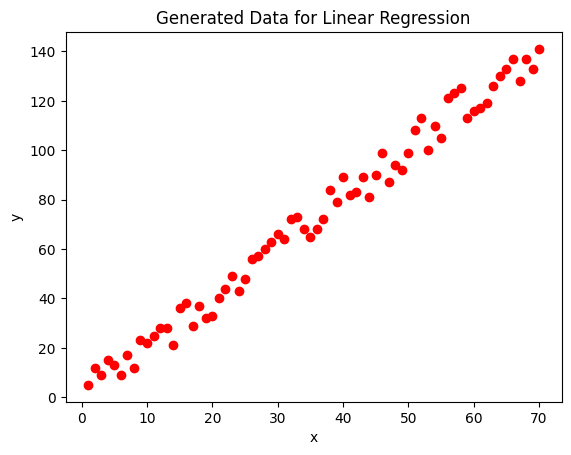

In [8]:
plt.scatter(X.numpy(), y.numpy(),color='red')  # Scatter plot of data points
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

📌 Step 4: Define a Linear Regression Model

In [9]:
# Setting a manual seed for reproducibility
torch.manual_seed(59)

# Defining the model class
model = nn.Linear(1, 1)  # Linear regression model with 1 input and 1 output

# Accessing weight and bias directly
print('Weight:', model.weight.item())
print('Bias:  ', model.bias.item())

Weight: 0.10597813129425049
Bias:   0.9637961387634277


📌 Step 6: Define the Loss Function and Optimizer

In [10]:
loss_function = nn.MSELoss()  # Mean Squared Error (MSE) loss

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Stochastic Gradient Descent


📌 Step 7: Training the Model

In [11]:
epochs = 50  # Number of training iterations
losses = []  # List to store loss values

for epoch in range(1, epochs + 1):  # Start from 1 to 50
    optimizer.zero_grad()  # Clear previous gradients
    y_pred = model(X)  # Forward pass
    loss = loss_function(y_pred, y)  # Compute loss
    losses.append(loss.item())  # Store loss value

    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Print loss, weight, and bias for EVERY epoch (1 to 50)
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.weight.item():10.8f}  '
          f'bias: {model.bias.item():10.8f}')


epoch:  1  loss: 5954.00195312  weight: 6.39712811  bias: 1.09820127
epoch:  2  loss: 32454.26367188  weight: -8.31483269  bias: 0.78566593
epoch:  3  loss: 177374.46875000  weight: 26.08920860  bias: 1.51830482
epoch:  4  loss: 969889.81250000  weight: -54.36505127  bias: -0.19320856
epoch:  5  loss: 5303866.00000000  weight: 133.77809143  bias: 3.81095338
epoch:  6  loss: 29004798.00000000  weight: -306.19680786  bias: -5.55105686
epoch:  7  loss: 158616544.00000000  weight: 722.68945312  bias: 16.34387779
epoch:  8  loss: 867415936.00000000  weight: -1683.37268066  bias: -34.85591125
epoch:  9  loss: 4743580672.00000000  weight: 3943.23120117  bias: 84.87713623
epoch: 10  loss: 25940918272.00000000  weight: -9214.64257812  bias: -195.11819458
epoch: 11  loss: 141861322752.00000000  weight: 21555.19140625  bias: 459.65557861
epoch: 12  loss: 775787905024.00000000  weight: -50400.40234375  bias: -1071.53833008
epoch: 13  loss: 4242498125824.00000000  weight: 117868.54687500  bias: 250

Plot the loss values

Pradeep E
212223230149
AI&DS

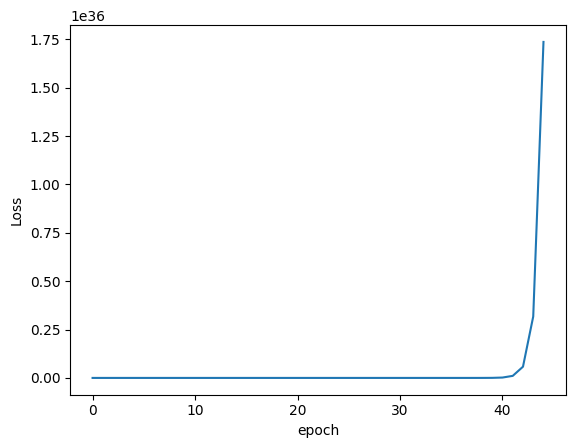

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()

📌 Step 8: Extract the Learned Weight and Bias

In [13]:
# Automatically determine x-range
x1 = torch.tensor([X.min().item(), X.max().item()])

# Extract model parameters
w1, b1 = model.weight.item(), model.bias.item()

# Compute y1 (predicted values)
y1 = x1 * w1 + b1


In [14]:
# Print weight, bias, and x/y values
print(f'Final Weight: {w1:.8f}, Final Bias: {b1:.8f}')
print(f'X range: {x1.numpy()}')
print(f'Predicted Y values: {y1.numpy()}')

Final Weight: -5274110438081036288.00000000, Final Bias: -112231532713738240.00000000
X range: [ 1. 70.]
Predicted Y values: [-5.3863420e+18 -3.6929995e+20]


📌 Step 9: Plot the Best-Fit Line

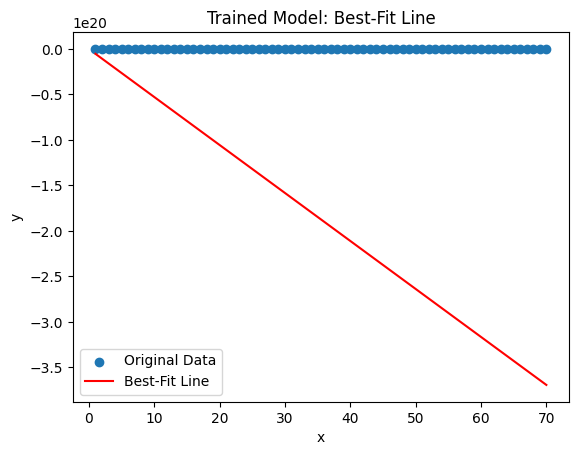

In [15]:
# Plot original data and best-fit line
plt.scatter(X.numpy(), y.numpy(), label="Original Data")
plt.plot(x1.numpy(), y1.numpy(), 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [17]:
torch.save(model.state_dict(), 'linear_regression.pt')
print("Model saved successfully!")

Model saved successfully!


Pradeep E
212223230149
AI&DS
